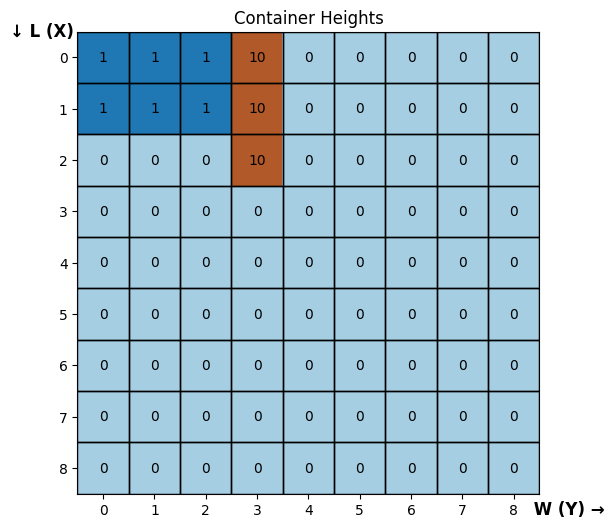


Matrix plane features with height [h, eˡ, eʷ, e⁻ˡ, e⁻ʷ, fˡ, fʷ]

(1,3,2,0,0,3,9) (1,2,2,1,0,2,9) (1,1,2,2,0,1,9) (10,1,3,0,0,6,9) (0,5,9,0,0,5,9) (0,4,9,1,0,4,9) (0,3,9,2,0,3,9) (0,2,9,3,0,2,9) (0,1,9,4,0,1,9)
(1,3,1,0,1,3,8) (1,2,1,1,1,2,8) (1,1,1,2,1,1,8) (10,1,2,0,1,6,8) (0,5,8,0,1,5,8) (0,4,8,1,1,4,8) (0,3,8,2,1,3,8) (0,2,8,3,1,2,8) (0,1,8,4,1,1,8)
(0,3,7,0,0,3,7) (0,2,7,1,0,2,7) (0,1,7,2,0,1,7) (10,1,1,0,2,6,7) (0,5,7,0,2,5,7) (0,4,7,1,2,4,7) (0,3,7,2,2,3,7) (0,2,7,3,2,2,7) (0,1,7,4,2,1,7)
(0,9,6,0,1,9,6) (0,8,6,1,1,8,6) (0,7,6,2,1,7,6) (0,6,6,3,0,6,6) (0,5,6,4,3,5,6) (0,4,6,5,3,4,6) (0,3,6,6,3,3,6) (0,2,6,7,3,2,6) (0,1,6,8,3,1,6)
(0,9,5,0,2,9,5) (0,8,5,1,2,8,5) (0,7,5,2,2,7,5) (0,6,5,3,1,6,5) (0,5,5,4,4,5,5) (0,4,5,5,4,4,5) (0,3,5,6,4,3,5) (0,2,5,7,4,2,5) (0,1,5,8,4,1,5)
(0,9,4,0,3,9,4) (0,8,4,1,3,8,4) (0,7,4,2,3,7,4) (0,6,4,3,2,6,4) (0,5,4,4,5,5,4) (0,4,4,5,5,4,4) (0,3,4,6,5,3,4) (0,2,4,7,5,2,4) (0,1,4,8,5,1,4)
(0,9,3,0,4,9,3) (0,8,3,1,4,8,3) (0,7,3,2,4,7,3) (0,6,3,3,3,6,3) (0,

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# container_matrix = np.array([
#     [5,5,5,5,4,4,4,4,4],
#     [5,5,5,5,4,4,4,4,4],
#     [5,5,5,5,4,4,4,4,4],
#     [2,2,2,2,2,2,0,3,3],
#     [2,2,2,2,2,2,0,3,3],
#     [2,2,2,2,2,2,0,3,3],
#     [2,2,2,2,2,2,0,3,3],
#     [2,2,2,2,2,2,0,3,3],
#     [0,0,0,0,0,0,0,3,3]
# ], dtype=int)

container_matrix = np.array([
    [1,1,1,10,0,0,0,0,0],
    [1,1,1,10,0,0,0,0,0],
    [0,0,0,10,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0]
], dtype=int)


L, W = container_matrix.shape
height = container_matrix.copy()

# Ausgewählte Zelle optional
#selected_cell = (5, 2)
selected_cell = None

# Plane-Features Zeile für Zeile berechnen
plane_features = np.zeros((L, W, 6), dtype=int)
plane_features_with_height = np.zeros((L, W, 7), dtype=int)

for w in range(W):
    for l in range(L):

        # e_lw^l: nach rechts (Größe der Ebene gleicher Höhe)
        e_l = 0
        for ww in range(w, W):
            if height[l, ww] != height[l, w]:
                break
            e_l += 1

        # e_lw^(-l): nach links (Größe der Ebene gleicher Höhe)
        e_minus_l = 0
        for ww in range(w-1, -1, -1):
            if height[l, ww] != height[l, w]:
                break
            e_minus_l += 1

        # e_lw^w: nach unten (Größe der Ebene gleicher Höhe)
        e_w = 0
        for ll in range(l, L):
            if height[ll, w] != height[l, w]:
                break
            e_w += 1

        # e_lw^(-w): nach oben (Größe der Ebene gleicher Höhe)
        e_minus_w = 0
        for ll in range(l-1, -1, -1):
            if height[ll, w] != height[l, w]:
                break
            e_minus_w += 1

        # f_l: nach rechts (nächste höhere Ebene oder Rand)
        f_l = 0
        for ww in range(w, W):
            if height[l, ww] > height[l, w]:
                break
            f_l += 1

        # f_w: nach unten (nächste höhere Ebene oder Rand)
        f_w = 0
        for ll in range(l, L):
            if height[ll, w] > height[l, w]:
                break
            f_w += 1

        plane_features[l, w] = [e_l, e_w, e_minus_l, e_minus_w, f_l, f_w]
        plane_features_with_height[l, w] = [height[l, w], e_l, e_w, e_minus_l, e_minus_w, f_l, f_w]

# Plot
cmap = plt.cm.Paired
norm = colors.Normalize(vmin=height.min(), vmax=height.max())

fig, ax = plt.subplots(figsize=(6,6)) 
im = ax.imshow(height, cmap=cmap, norm=norm) 

# Rahmen, Text und Hervorhebung 
for w in range(W): 
    for l in range(L): 
        rect = plt.Rectangle((w-0.5, l-0.5), 1, 1, fill=False, edgecolor='black', lw=1) 
        ax.add_patch(rect) 
        ax.text(w, l, str(height[l,w]), ha='center', va='center', color='black')

if selected_cell:
    l_sel, w_sel = selected_cell
    hatch_rect = plt.Rectangle((w_sel-0.5, l_sel-0.5), 1, 1, fill=False, edgecolor='gray', lw=0, hatch='xxxxxx')
    ax.add_patch(hatch_rect)

ax.set_xticks(np.arange(W))
ax.set_yticks(np.arange(L))
ax.set_title("Container Heights")
ax.text(-0.8, -0.5, "↓ L (X)       ", fontsize=12, fontweight='bold', color='black', va='center', ha='center')
ax.text(W-0.2, L-0.2, "     W (Y) →", fontsize=12, fontweight='bold', color='black', va='center', ha='center')
plt.show()


# Funktion zum Abrufen der Plane-Features
def get_plane_features(cell):
    l, w = cell
    if 0 <= l < L and 0 <= w < W:
        c_lw = plane_features_with_height[l, w]
        print(f"Plane-Features at ({l},{w}):")
        print(f"h={c_lw[0]}, eˡ={c_lw[1]}, eʷ={c_lw[2]}, e⁻ˡ={c_lw[3]}, e⁻ʷ={c_lw[4]}, fˡ={c_lw[5]}, fʷ={c_lw[6]}")
        print(f"c_lw = {c_lw}")
    else:
        raise ValueError("Koordinaten außerhalb des Containers")

if selected_cell != None:
    get_plane_features(selected_cell)

# Plane-Features-Ausgabe aller Zellen
print("\nMatrix plane features with height [h, eˡ, eʷ, e⁻ˡ, e⁻ʷ, fˡ, fʷ]\n")
for l in range(L):
    row_str = ""
    for w in range(W):
        vals = plane_features_with_height[l, w]
        # Format: (h,eˡ,eʷ,e⁻ˡ,e⁻ʷ,fˡ,fʷ)
        row_str += f"({vals[0]},{vals[1]},{vals[2]},{vals[3]},{vals[4]},{vals[5]},{vals[6]}) "
    print(row_str.strip())




# Plane-Features-Ausgabe einzelner features
# print("\n\neˡ feature")
# for l in range(L):
#     row_str = ""
#     for w in range(W):
#         vals = plane_features_with_height[l, w][1]
#         # Format: (h,eˡ,eʷ,e⁻ˡ,e⁻ʷ,fˡ,fʷ)
#         row_str += f"({vals}) "
#     print(row_str.strip())